In [1]:
import pandas as pd
from DATA225utils import make_connection, dataframe_query

In [2]:
conn = make_connection(config_file='checkpoint3.ini')
pd.set_option('display.max_rows', None)

In [3]:
def show_results(sql):
    _, df = dataframe_query(conn, sql)
    display(df)

## What's there?
#### By the way, the scores are meaningless values randomly generated for this exam.

In [4]:
sql = ( """
        SELECT cpu.model AS cpu_model, 
               os.name AS os_name, 
               os.version AS os_version, 
               os.release_date,
               benchmark.spec AS benchmark_spec, 
               rating.score AS rating_score
        FROM cpu, os, benchmark, rating
        WHERE rating.cpu       = cpu.skey
        AND   rating.os        = os.skey
        AND   rating.benchmark = benchmark.skey
        ORDER BY cpu.model, os.name, os.version, 
                 benchmark.spec, rating.score
        """
      )

show_results(sql)

cpu_model     os_name os_version release_date benchmark_spec  rating_score
0         i7  Windows 10       21H2   2021-11-16        FLOAT-1           4.6
1         i7  Windows 10       21H2   2021-11-16        FLOAT-2           3.8
2         i7  Windows 10       21H2   2021-11-16          INT-1           3.9
3         i7  Windows 10       21H2   2021-11-16          INT-2           4.5
4         i7  Windows 10       21H2   2021-11-16       STRING-1           4.7
5         i7  Windows 10       21H2   2021-11-16       STRING-2           4.8
6         i7  Windows 10       22H2   2022-10-18        FLOAT-1           3.1
7         i7  Windows 10       22H2   2022-10-18        FLOAT-2           3.6
8         i7  Windows 10       22H2   2022-10-18          INT-1           4.0
9         i7  Windows 10       22H2   2022-10-18          INT-2           3.1
10        i7  Windows 10       22H2   2022-10-18       STRING-1           4.9
11        i7  Windows 10       22H2   2022-10-18       STRING-2           3.3
12        i7  Windows 11       22H2   2022-09-20        FLOAT-1           4.9
13        i7  Windows 11       22H2   2022-09-20        FLOAT-2           4.7
14        i7  Windows 11       22H2   2022-09-20          INT-1           3.7
15        i7  Windows 11       22H2   2022-09-20          INT-2           3.7
16        i7  Windows 11       22H2   2022-09-20       STRING-1           4.4
17        i7  Windows 11       22H2   2022-09-20       STRING-2           4.1
18        i7  Windows 11       23H2   2023-10-31        FLOAT-1           4.6
19        i7  Windows 11       23H2   2023-10-31        FLOAT-2           4.0
20        i7  Windows 11       23H2   2023-10-31          INT-1           4.6
21        i7  Windows 11       23H2   2023-10-31          INT-2           3.9
22        i7  Windows 11       23H2   2023-10-31       STRING-1           3.4
23        i7  Windows 11       23H2   2023-10-31       STRING-2           3.5
24        i9  Windows 10       21H2   2021-11-16        FLOAT-1           3.6
25        i9  Windows 10       21H2   2021-11-16        FLOAT-2           3.0
26        i9  Windows 10       21H2   2021-11-16          INT-1           3.5
27        i9  Windows 10       21H2   2021-11-16          INT-2           3.1
28        i9  Windows 10       21H2   2021-11-16       STRING-1           3.6
29        i9  Windows 10       21H2   2021-11-16       STRING-2           4.5
30        i9  Windows 10       22H2   2022-10-18        FLOAT-1           4.8
31        i9  Windows 10       22H2   2022-10-18        FLOAT-2           3.8
32        i9  Windows 10       22H2   2022-10-18          INT-1           3.9
33        i9  Windows 10       22H2   2022-10-18          INT-2           3.4
34        i9  Windows 10       22H2   2022-10-18       STRING-1           4.5
35        i9  Windows 10       22H2   2022-10-18       STRING-2           3.4
36        i9  Windows 11       22H2   2022-09-20        FLOAT-1           4.5
37        i9  Windows 11       22H2   2022-09-20        FLOAT-2           3.7
38        i9  Windows 11       22H2   2022-09-20          INT-1           3.8
39        i9  Windows 11       22H2   2022-09-20          INT-2           4.8
40        i9  Windows 11       22H2   2022-09-20       STRING-1           4.9
41        i9  Windows 11       22H2   2022-09-20       STRING-2           4.1
42        i9  Windows 11       23H2   2023-10-31        FLOAT-1           4.6
43        i9  Windows 11       23H2   2023-10-31        FLOAT-2           3.3
44        i9  Windows 11       23H2   2023-10-31          INT-1           4.1
45        i9  Windows 11       23H2   2023-10-31          INT-2           3.3
46        i9  Windows 11       23H2   2023-10-31       STRING-1           4.4
47        i9  Windows 11       23H2   2023-10-31       STRING-2           4.3
48        M2       macOS         13   2022-10-24        FLOAT-1           3.1
49        M2       macOS         13   2022-10-24        FLOAT-2           4.6
50        M2       macOS 

## QUESTION 1: What is the overall average of all the scores?

In [5]:
sql = ( """
        SELECT AVG(score)
        FROM rating
        """
      )

show_results(sql)

AVG(score)
0    3.965625

## QUESTION 2: For each CPU model, what is its overall average?

In [6]:
sql = ( """
        SELECT model, AVG(score)
        FROM cpu, rating
        WHERE rating.cpu = cpu.skey
        GROUP BY model
        """
      )

show_results(sql)

model  AVG(score)
0    i7    4.075000
1    i9    3.954167
2    M2    3.858333
3    M3    3.975000

## QUESTION 3: What are the overall average scores for operating systems released in 2022 or later running on CPUs i9 and M3?

In [7]:
sql = ( """
        SELECT model, os.name, version, release_date, AVG(score)
        FROM cpu, os, benchmark, rating
        WHERE cpu.model IN ('i9', 'M3')
        AND   os.year >= 2022
        AND   rating.cpu       = cpu.skey
        AND   rating.os        = os.skey
        AND   rating.benchmark = benchmark.skey
        GROUP BY model, os.name, release_date, version
        ORDER BY model, os.name, version
        """
      )

show_results(sql)

model        name version release_date  AVG(score)
0    i9  Windows 10    22H2   2022-10-18    3.966667
1    i9  Windows 11    22H2   2022-09-20    4.300000
2    i9  Windows 11    23H2   2023-10-31    4.000000
3    M3       macOS      13   2022-10-24    3.583333
4    M3       macOS      14   2023-09-26    4.066667

## QUESTION 4: What is the average score of each operating system version running on each CPU model? Order the results by operating system name, version, and CPU model.

In [8]:
sql = ( """
        SELECT os.name, os.version, cpu.model, AVG(score)
        FROM cpu, os, rating
        WHERE rating.cpu = cpu.skey
        AND   rating.os  = os.skey
        GROUP BY os.name, os.version, cpu.model
        ORDER BY os.name, os.version, cpu.model
        """
      )

show_results(sql)

name version model  AVG(score)
0        macOS      13    M2    3.816667
1        macOS      13    M3    3.583333
2        macOS      14    M2    3.850000
3        macOS      14    M3    4.066667
4         OS X    10.1    M2    3.733333
5         OS X    10.1    M3    3.883333
6         OS X   10.11    M2    4.033333
7         OS X   10.11    M3    4.366667
8   Windows 10    21H2    i7    4.383333
9   Windows 10    21H2    i9    3.550000
10  Windows 10    22H2    i7    3.666667
11  Windows 10    22H2    i9    3.966667
12  Windows 11    22H2    i7    4.250000
13  Windows 11    22H2    i9    4.300000
14  Windows 11    23H2    i7    4.000000
15  Windows 11    23H2    i9    4.000000

## QUESTION 5: For each operating systems company Apple and Microsoft, what is the overall average of its scores?

In [9]:
sql = ( """
        SELECT os.company, AVG(score)
        FROM  os, rating
        WHERE os.company IN ('Apple', 'Microsoft')
        AND   rating.os = os.skey
        GROUP BY os.company
        """
      )

show_results(sql)

company  AVG(score)
0  Microsoft    4.014583
1      Apple    3.916667

## QUESTION 6: In a SINGLE query, generate these averages:

- ### For each CPU model, the overall average score of each operating system version.
- ### For each CPU model, the overall average score of each operating system company.
- ### The overall average score of each CPU model.
- ### The overall average of all the scores.
#### This is a straightforward rollup.

In [10]:
sql = ( """
        SELECT model, os.company, os.name, version, AVG(score)
        FROM cpu, os, benchmark, rating
        WHERE rating.cpu       = cpu.skey
        AND   rating.os        = os.skey
        AND   rating.benchmark = benchmark.skey
        GROUP BY model, os.company, os.name, version
        WITH ROLLUP
        """
      )

show_results(sql)

model    company        name version  AVG(score)
0     i7  Microsoft  Windows 10    21H2    4.383333
1     i7  Microsoft  Windows 10    22H2    3.666667
2     i7  Microsoft  Windows 10    None    4.025000
3     i7  Microsoft  Windows 11    22H2    4.250000
4     i7  Microsoft  Windows 11    23H2    4.000000
5     i7  Microsoft  Windows 11    None    4.125000
6     i7  Microsoft        None    None    4.075000
7     i7       None        None    None    4.075000
8     i9  Microsoft  Windows 10    21H2    3.550000
9     i9  Microsoft  Windows 10    22H2    3.966667
10    i9  Microsoft  Windows 10    None    3.758333
11    i9  Microsoft  Windows 11    22H2    4.300000
12    i9  Microsoft  Windows 11    23H2    4.000000
13    i9  Microsoft  Windows 11    None    4.150000
14    i9  Microsoft        None    None    3.954167
15    i9       None        None    None    3.954167
16    M2      Apple       macOS      13    3.816667
17    M2      Apple       macOS      14    3.850000
18    M2      Apple       macOS    None    3.833333
19    M2      Apple        OS X    10.1    3.733333
20    M2      Apple        OS X   10.11    4.033333
21    M2      Apple        OS X    None    3.883333
22    M2      Apple        None    None    3.858333
23    M2       None        None    None    3.858333
24    M3      Apple       macOS      13    3.583333
25    M3      Apple       macOS      14    4.066667
26    M3      Apple       macOS    None    3.825000
27    M3      Apple        OS X    10.1    3.883333
28    M3      Apple        OS X   10.11    4.366667
29    M3      Apple        OS X    None    4.125000
30    M3      Apple        None    None    3.975000
31    M3       None        None    None    3.975000
32  None       None        None    None    3.965625

## QUESTION 7: A book publisher wants to analyze its fiction book sales. The analysis will analyze and compare the sales of books in different genres, such as adventure, mystery, and romance. Within each genre, there can be subgenres. For example, mystery can include crime, murder, and espionage. The analysis will also compare sales from the publisher’s authors, whether they’re male, female, young, old, gay, straight, etc. Bookstores can also be analyzed, such as their sizes, locations, chain or independent, physical or online, etc. The publisher will want to look at how the sales of its current books compare with sales in the past.

## What database you would design for this publisher? What tables would it have, and would they be related to each other? Briefly describe the columns of each table.

#### The solution I have in mind is a dimensional model implemented by a star schema, such as the one below. Unfortunately, the lockdown browser didn't allow you to make screenshots of diagrams created in ERPPlus. So I can only grade your written descriptions of your solutions.

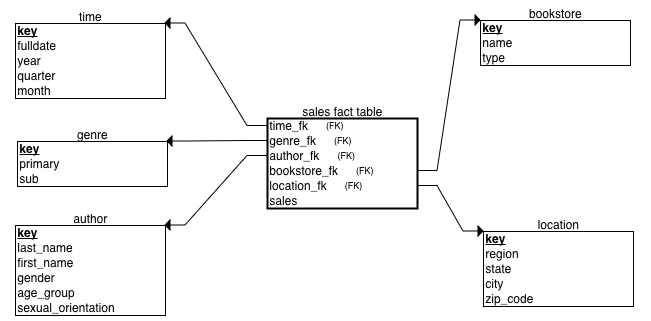